In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import confusion_matrix_pretty_print
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data

from sklearn.metrics import confusion_matrix,classification_report,precision_score, auc, precision_recall_curve, roc_curve

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Softmax, Dropout
from keras import optimizers
from keras import metrics as kmetr
from keras.utils import plot_model

import pydot

Using TensorFlow backend.
/home/amin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/amin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/amin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/amin/.local/lib/python3.6/site-packages/tensorflow/python/framewo

In [2]:
# #### Hold out Zeros

# data = pd.read_csv('../../saved F(triple_cosineSNF).csv')

# data[data.iloc[:,2]==0].to_csv('../../triple_cosineSNF(zeros).csv',index=False)
# del data

In [3]:
# data = pd.read_csv('../../saved F(triple_cosineSNF).csv')
# data = data[data['2']!=0]
# data.to_csv('triple_cosineSNF(-1and1).csv',index=False)


In [4]:
dataTrain = pd.read_csv('../../triple443110_revised_ShuffledPaired.csv')
dataTest = pd.read_csv('../../tripleTest_revised.csv')
# dataTest = pd.read_csv('../../triple_cosineSNF(zeros).csv')

# print(dataTest.shape,dataTrain.shape)

In [5]:
# dataTest.head()

In [6]:
# X_train = dataTrain.values[:,3:]
# y_train = dataTrain.values[:,2].astype(int)
# del dataTrain
# # X_test = dataTest.values[:,3:]
# # y_test = dataTest.values[:,2].astype(int)


In [7]:
# trainNum = len(X_train)

In [8]:
# # X_train = dataTrain.values[:,3:]
# # y_train = dataTrain.values[:,2].astype(int)
# # del dataTrain
# X_test = dataTest.values[:,3:]
# y_test = dataTest.values[:,2].astype(int)

# testNum = len(X_test)

In [9]:
16*71

1136

In [10]:
# # X_train = dataTrain.values[:,3:]
# # y_train = dataTrain.values[:,2].astype(int)
# # del dataTrain
# X_test = dataTest.values[:,3:]
# y_test = dataTest.values[:,2].astype(int)

# testNum = len(X_test)

# #reshape data to fit model
# # X_train = X_train.reshape(trainNum,16,71,1)
# X_test = X_test.reshape(testNum,16,71,1)

In [11]:
# X_train.shape

In [12]:
# # X_train = dataTrain.values[:,3:]
# # y_train = dataTrain.values[:,2].astype(int)
# # del dataTrain
# X_test = dataTest.values[:,3:]
# y_test = dataTest.values[:,2].astype(int)

# testNum = len(X_test)

# #reshape data to fit model
# # X_train = X_train.reshape(trainNum,16,71,1)
# X_test = X_test.reshape(testNum,16,71,1)

# # y_train = y_train + 1
# y_test  = y_test + 1
# # y_train = y_train / 2
# y_test  = y_test / 2
# # print(y_train[0], y_test[0])

In [13]:
# y_train

In [14]:
# # X_train = dataTrain.values[:,3:]
# # y_train = dataTrain.values[:,2].astype(int)
# # del dataTrain
# X_test = dataTest.values[:,3:]
# y_test = dataTest.values[:,2].astype(int)

# testNum = len(X_test)

# #reshape data to fit model
# # X_train = X_train.reshape(trainNum,16,71,1)
# X_test = X_test.reshape(testNum,16,71,1)

# # y_train = y_train + 1
# y_test  = y_test + 1
# # y_train = y_train / 2
# y_test  = y_test / 2
# # print(y_train[0], y_test[0])

# #one-hot encode target column
# # y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# # y_test[0]

In [15]:
# y_train

In [16]:
X_train = dataTrain.values[:,3:]
y_train = dataTrain.values[:,2].astype(int)
del dataTrain
trainNum = len(X_train)
X_test = dataTest.values[:,3:]
y_test = dataTest.values[:,2].astype(int)
# del dataTest
testNum = len(X_test)

#reshape data to fit model
X_train = X_train.reshape(trainNum,16,71,1)
X_test = X_test.reshape(testNum,16,71,1)

y_train = y_train + 1
y_test  = y_test + 1
y_train = y_train / 2
y_test  = y_test / 2
print(y_train[0:5], y_test[0:5])

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# y_test[0]


[1. 1. 0. 0. 1.] [1. 1. 1. 1. 1.]


In [17]:
print(y_train[0:5], y_test[0:5])

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]] [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [19]:
# #create model
# model = Sequential()
# #add model layers
# # kernel_initializer='uniform',
# # kernel_initializer='uniform',
# # kernel_initializer='uniform',
# # kernel_initializer='uniform',
# model.add(Conv2D(128, kernel_size=4, activation='relu', input_shape=(16,71,1)))
# # model.add(Conv2D(64, kernel_size=2, activation='relu'))

# model.add(Conv2D(32, kernel_size=4, activation='relu'))
# # model.add(Conv2D(16, kernel_size=2, activation='relu'))
# model.add(Conv2D(8, kernel_size=4, activation='relu'))
# model.add(Flatten())
# # model.add(Dense( 64, activation='relu'))
# model.add(Dense( 32, activation='relu'))
# # model.add(Dropout(0.2))
# model.add(Dropout(0.4))
# # model.add(Dense( 16, activation='relu'))
# model.add(Dense( 8, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense( 2, activation='sigmoid'))
# # model.add(Softmax(128))
# model.summary()

#create model
model = Sequential()
#add model layers
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
model.add(Conv2D(128, kernel_size=4, activation='relu', input_shape=(16,71,1)))
# model.add(Conv2D(64, kernel_size=2, activation='relu'))

model.add(Conv2D(32, kernel_size=4, activation='relu'))
# model.add(Conv2D(16, kernel_size=2, activation='relu'))
model.add(Conv2D(8, kernel_size=4, activation='relu'))
model.add(Flatten())
model.add(Dense( 64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense( 16, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
# model.add(Softmax(128))
model.summary()

#compile model using accuracy to measure model performance


adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
# model.compile(loss='hinge', optimizer=adam, metrics=[kmetr.categorical_accuracy])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) ## Minist

### Load the model's saved weights.
model.load_weights('cnn43110(1and-1)_rivised_8_epoch.h5')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 13, 68, 128)       2176      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 65, 32)        65568     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 62, 8)          4104      
_________________________________________________________________
flatten_2 (Flatten)          (None, 3472)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                222272    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)               

In [50]:
# #### plotting model
# plot_model(model,show_shapes = True, to_file='model dense64to32_dense16to8_Dropout0.2to0.4_addingDropout0.4.png')

In [92]:
# #### train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1)
# history = model.fit(X_train, y_train, epochs=1)


Train on 43110 samples, validate on 4310 samples
Epoch 1/1
43110/43110 [==============================] - 300s 7ms/step - loss: 0.0409 - acc: 0.9820 - val_loss: 0.0184 - val_acc: 0.9900


In [93]:
### Saveing the Model
model.save_weights('cnn43110(1and-1)_rivised_12_epoch.h5')


In [94]:
predit = model.predict(X_test)
#actual results for first 4 images in test set
print(predit[:4])



[[4.4703484e-07 9.9999839e-01]
 [1.7881393e-07 9.9999845e-01]
 [0.0000000e+00 9.9999994e-01]
 [0.0000000e+00 1.0000000e+00]]


In [95]:
# #from sklearn.metrics import precision_recall_curve, roc_curve

prec, rec, thr = precision_recall_curve(y_test[:,0], predit[:,0])
aupr_val = auc(rec, prec)
fpr, tpr, thr = roc_curve(y_test[:,0], predit[:,0])
auc_val = auc(fpr, tpr)
print(aupr_val,auc_val)

0.8958347599598473 0.9838669769815434


In [78]:
# model.history.history

In [79]:

# # Plot training & validation accuracy values
# plt.plot(list(range(1,6)),model.history.history['acc'])
# plt.plot(list(range(1,6)),model.history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# # Plot training & validation loss values
# plt.plot(list(range(1,6)),model.history.history['loss'])
# plt.plot(list(range(1,6)),model.history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [80]:
# # predit
# predit[:,0].shape 

In [96]:
predicts = []
for a,b in predit:
    if a >=b:
        predicts.append(0)
    else:
        predicts.append(1)
len(predicts)

4310

In [97]:
predicts1 = []
e = d = z = 0

for a,b in predit:
    if a >=0.90:
        predicts1.append(0)
        d += 1
    elif b>=0.95:
        predicts1.append(2)
        e += 1
    elif a<=0.05 and b<=0.1:
        predicts1.append(1)
        z += 1
print('degrassive', d, 'enhancive', e, 'zeros', z)
print("""
Epoch04: degrassive 224 enhancive 2939 zeros 40
Epoch05: degrassive 280 enhancive 2823 zeros 39
Epoch06: degrassive 233 enhancive 2879 zeros 79
Epoch07: degrassive 203 enhancive 2926 zeros 134
Epoch08: degrassive 224 enhancive 2895 zeros 180
Epoch09: degrassive 191 enhancive 2856 zeros 191
Epoch10: degrassive 189 enhancive 2821 zeros 246
Epoch11: degrassive 164 enhancive 2581 zeros 235
Epoch12: degrassive 166 enhancive 2454 zeros 266
""")

degrassive 166 enhancive 2454 zeros 266
Epoch4: degrassive 224 enhancive 2939 zeros 40
Epoch05: degrassive 280 enhancive 2823 zeros 39
Epoch06: degrassive 233 enhancive 2879 zeros 79
Epoch07: degrassive 203 enhancive 2926 zeros 134
Epoch08: degrassive 224 enhancive 2895 zeros 180
Epoch09: degrassive 191 enhancive 2856 zeros 191
Epoch10: degrassive 189 enhancive 2821 zeros 246
Epoch11: degrassive 164 enhancive 2581 zeros 235



In [83]:
# max(list((dataTest.values[:,2]+1)/2))

[[ 894   23]
 [  20 3373]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       914
         1.0       0.99      0.99      0.99      3396

    accuracy                           0.99      4310
   macro avg       0.98      0.99      0.99      4310
weighted avg       0.99      0.99      0.99      4310

0.030837941301573798


/media/amin/Seagate Expansion Drive/7270/Github/DDI-Project/CNN model to Recommend Comperhancive DDIs/confusion_matrix_pretty_print.py:165: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/media/amin/Seagate Expansion Drive/7270/Github/DDI-Project/CNN model to Recommend Comperhancive DDIs/confusion_matrix_pretty_print.py:166: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  t.tick2On = False
/media/amin/Seagate Expansion Drive/7270/Github/DDI-Project/CNN model to Recommend Comperhancive DDIs/confusion_matrix_pretty_print.py:168: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  t.tick1On = False
/media/amin/Seagate Expansion Drive/7270/Github/DDI-Project/C

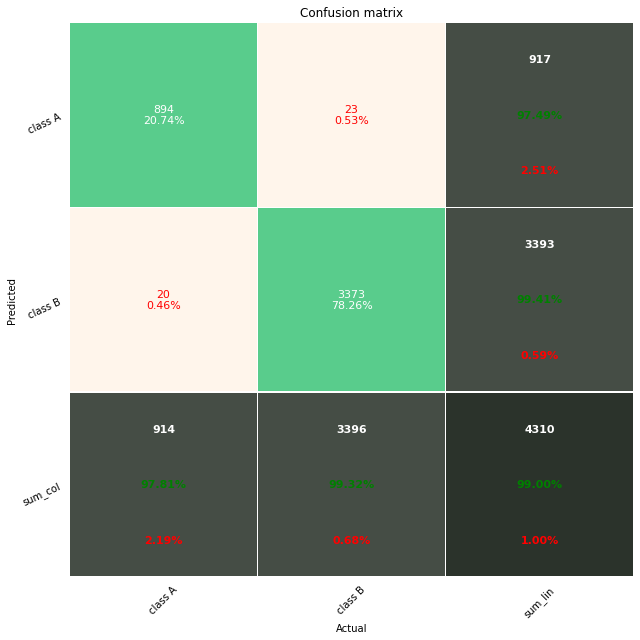

In [98]:

cm = confusion_matrix(list(predicts), list((dataTest.values[:,2]+1)/2))
print(cm)

CR = classification_report(list((dataTest.values[:,2]+1)/2),list(predicts))
print(CR)
print(145/4702)
# i=0
# for j in list(data.values[9500:,2]+1):
#     if j==1:
#         i +=1
# print(i)

# plt.show()
plot_confusion_matrix_from_data(list((dataTest.values[:,2]+1)/2), list(predicts))


In [99]:
print(pd.DataFrame(predit))

                 0         1
0     4.470348e-07  0.999998
1     1.788139e-07  0.999998
2     0.000000e+00  1.000000
3     0.000000e+00  1.000000
4     3.129244e-06  0.937484
...            ...       ...
4305  3.576279e-07  0.999897
4306  8.344650e-07  0.999998
4307  5.751848e-06  0.999975
4308  2.016597e-05  0.999558
4309  1.129572e-04  0.997998

[4310 rows x 2 columns]


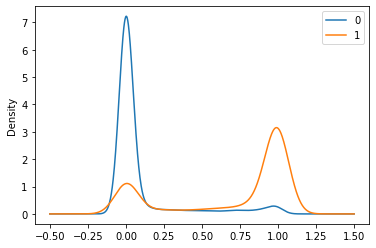

In [100]:
pd.DataFrame(predit).plot.density()


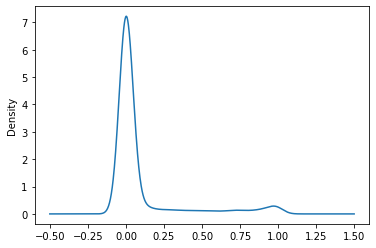

In [101]:
pd.DataFrame(predit).iloc[:,0].plot.density()

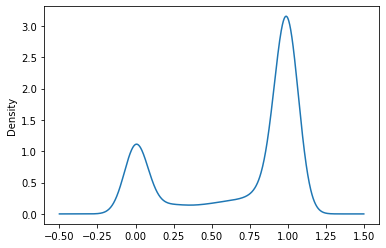

In [102]:
pd.DataFrame(predit).iloc[:,1].plot.density()

Text(0, 0.5, 'frequency distribution')

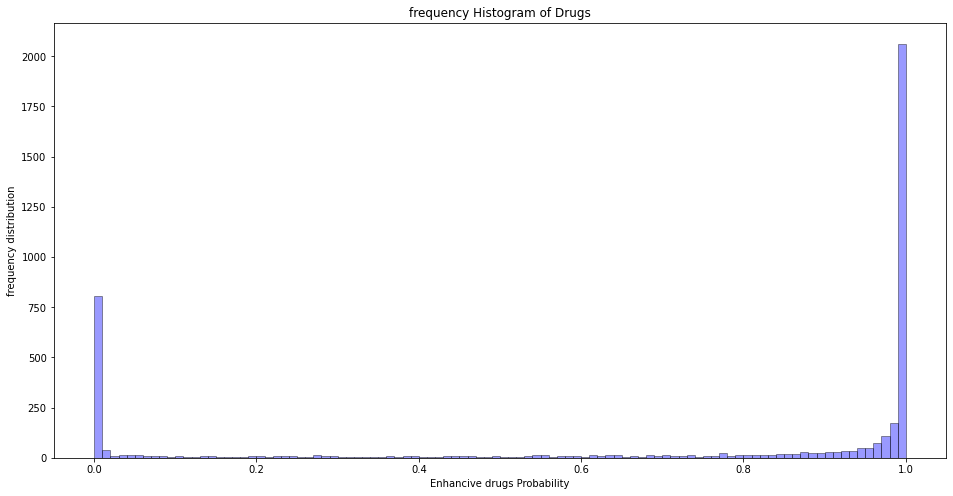

In [103]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Enhancive drugs Probability')
plt.ylabel('frequency distribution')


Text(0, 0.5, 'frequency distribution')

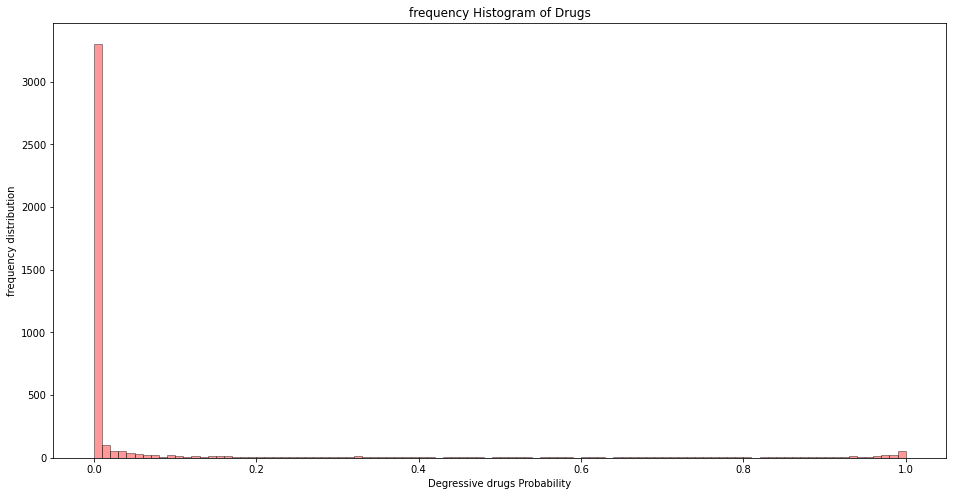

In [104]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Degressive drugs Probability')
plt.ylabel('frequency distribution')

Text(0, 0.5, 'frequency distribution')

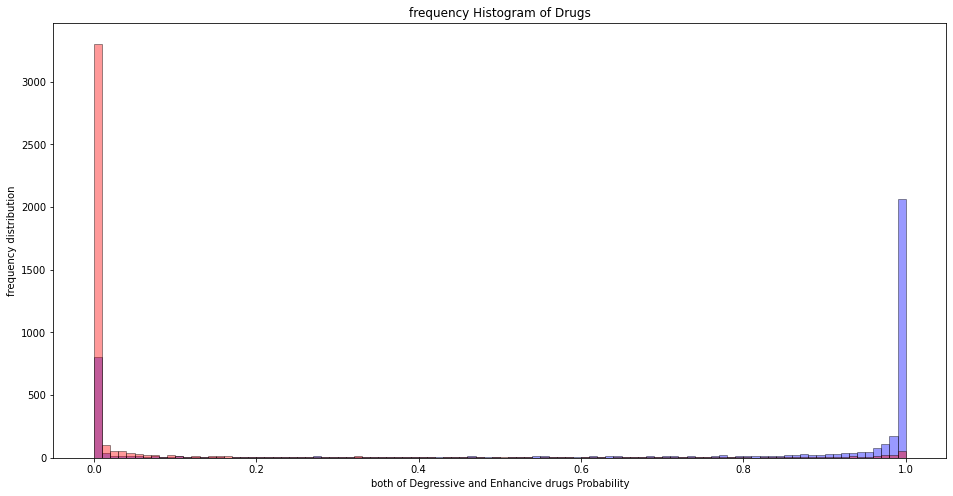

In [105]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('both of Degressive and Enhancive drugs Probability')
plt.ylabel('frequency distribution')